In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from plots import *
from sklearn.metrics import r2_score

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the diabetes dataset
data = pd.read_csv("C:\\Users\\MSIS\\Downloads\\archive\\Experience-Salary.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [3]:
X = data['exp(in months)']
y = data['salary(in thousands)']

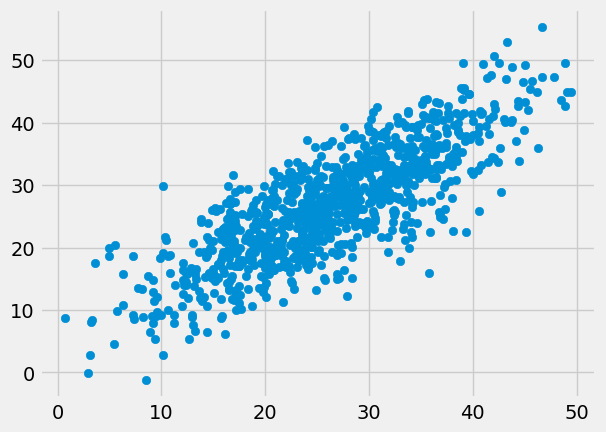

In [4]:
plt.scatter(X,y)

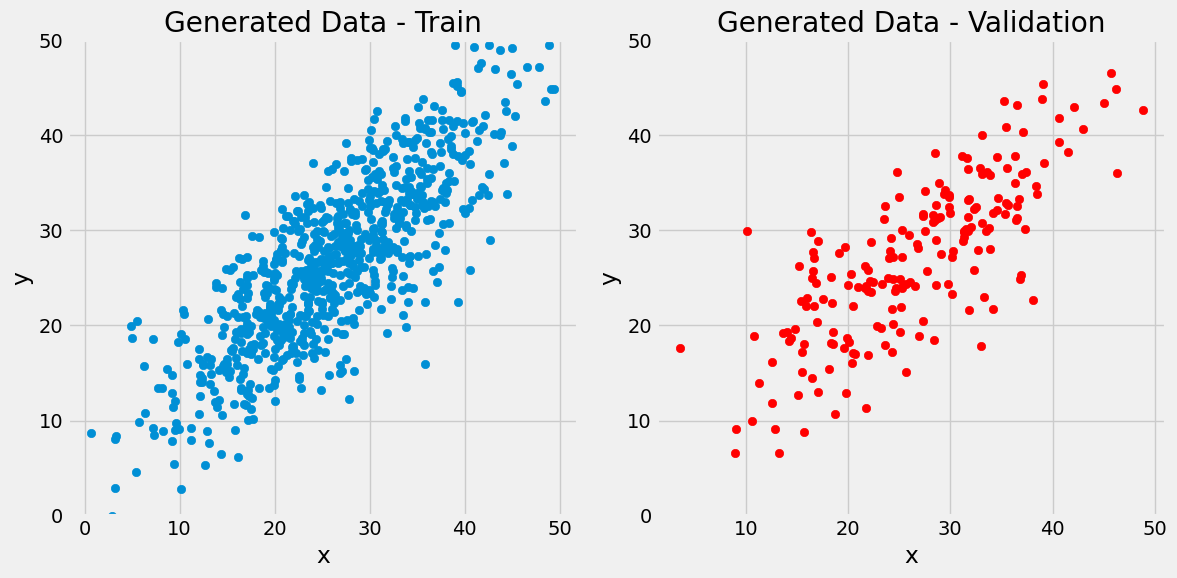

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
plot_train_test(X_train, y_train, X_val, y_val)

In [6]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    f_wb = w * x + b
    cost = np.sum((f_wb - y) ** 2)
    total_cost = (1 / (2 * m)) * cost

    return total_cost

In [7]:

def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w, b (scalar): model parameters
    Returns:
      dj_dw (scalar): The gradient of the cost w.r.t. the parameter w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """

    m = x.shape[0]

    f_wb = w * x + b
    dj_dw = np.mean((f_wb - y) * x)
    dj_db = np.mean(f_wb - y)

    return dj_dw, dj_db

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w, b. Updates w, b by taking
    num_iters gradient steps with learning rate alpha.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w_in, b_in (scalar): initial values of model parameters
      alpha (float): Learning rate
      num_iters (int): number of iterations to run gradient descent
      cost_function: function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w, b]
    """

    w = w_in
    b = b_in
    J_history = []  # List to store cost history
    p_history = []  # List to store parameter history [w, b]

    for i in range(num_iters):
        # Calculate the gradients for w and b using the gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update w and b using vectorized operations
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Calculate and store the cost at each iteration
        J_history.append(cost_function(x, y, w, b))
        p_history.append([w, b])

        # Print cost and parameter updates
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]}",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db}",
                  f"w: {w}, b: {b}")

    return w, b, J_history, p_history

In [9]:
w_init = 0
b_init = 0

# Some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-6

# Convert X_train and y_train to NumPy arrays for consistency
X_train = np.array(X_train)
y_train = np.array(y_train)

# Run gradient descent using the vectorized function
w_final, b_final, J_hist, p_hist = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w, b) found by gradient descent: ({w_final}, {b_final})")

Iteration    0: Cost 393.214050977081 dj_dw: -756.1565484029302, dj_db: -26.611565316505512 w: 0.0007561565484029302, b: 2.661156531650551e-05
Iteration 1000: Cost 98.15379395604278 dj_dw: -355.42570803384194, dj_db: -12.769324827440514 w: 0.531373644513829, b: 0.01884749954637773
Iteration 2000: Cost 32.95970878486237 dj_dw: -167.06041863863175, dj_db: -6.262692682243272 w: 0.7807837277638455, b: 0.027954769160850698
Iteration 3000: Cost 18.55481374159405 dj_dw: -78.51848853977646, dj_db: -3.2041954373240777 w: 0.8980110371296595, b: 0.032496083580425106
Iteration 4000: Cost 15.371847614132607 dj_dw: -36.89896659753008, dj_db: -1.7665091386080038 w: 0.9531052543946104, b: 0.03489112447442095
Iteration 5000: Cost 14.668379383292184 dj_dw: -17.33552854917278, dj_db: -1.0906921414534851 w: 0.9789935399252214, b: 0.036277273834002234
Iteration 6000: Cost 14.512759048944233 dj_dw: -8.139649538033241, dj_db: -0.7729951559471124 w: 0.9911534499672477, b: 0.037189163058670566
Iteration 7000: 

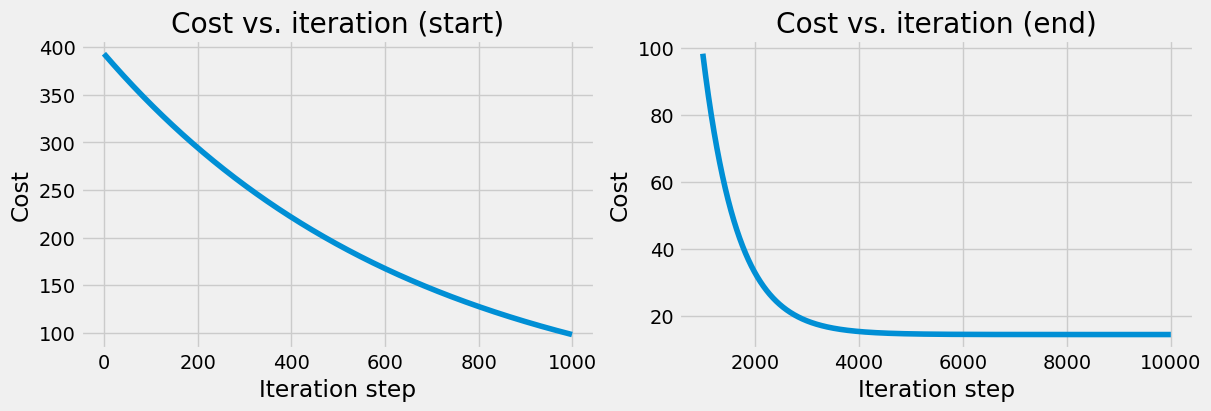

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# First plot for the initial iterations (e.g., first 100)
ax1.plot(J_hist[:1000])
ax1.set_title("Cost vs. iteration (start)")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')

# Second plot for the remaining iterations (e.g., from 1000 onwards)
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax2.set_title("Cost vs. iteration (end)")
ax2.set_ylabel('Cost')
ax2.set_xlabel('Iteration step')

plt.show()

In [11]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final * X_train[i] + b_final

Text(0.5, 0, 'x')

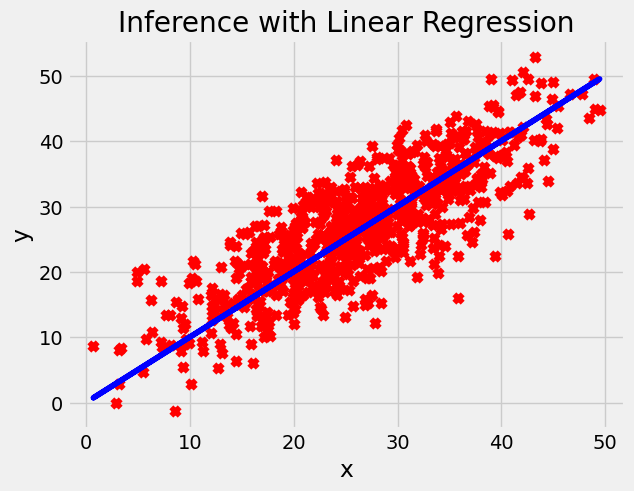

In [12]:
# Plot the linear fit
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Inference with Linear Regression")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')